In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, metrics
from scipy.stats import ttest_ind
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
# Try reading the Excel file with header set to the second row
defaulters_df = pd.read_excel('~/Downloads/default of credit card clients.xls', header=1)

# Display the DataFrame
defaulters_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Data Cleaning : Removing Missing values

In [3]:
# Checking for Missing Values
missing_values = defaulters_df.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values)

total_missing_values = defaulters_df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
Total missing values in the DataFrame: 0


#### We see that there are no missing values in the data set

In [4]:
# Checking how many columns have '0' as a value. Excluding the 'Outcome' column
columns_to_check = defaulters_df.columns.difference(['default payment next month', 'PAY_0' , 'PAY_2' ,	'PAY_3' , 'PAY_4' , 'PAY_5' , 'PAY_6'])

# Counting the number of zeros in each column
columns_with_zeros = (defaulters_df[columns_to_check] == 0).sum()

# Summing the counts across all columns
total_zeros = columns_with_zeros.sum()

# Displaying the count of zeros for each column and the total count
print("Zeros in each column (excluding 'defaulters'):")
print(columns_with_zeros)
print("\nTotal zeros across all columns:", total_zeros)

Zeros in each column (excluding 'defaulters'):
AGE             0
BILL_AMT1    2008
BILL_AMT2    2506
BILL_AMT3    2870
BILL_AMT4    3195
BILL_AMT5    3506
BILL_AMT6    4020
EDUCATION      14
ID              0
LIMIT_BAL       0
MARRIAGE       54
PAY_AMT1     5249
PAY_AMT2     5396
PAY_AMT3     5968
PAY_AMT4     6408
PAY_AMT5     6703
PAY_AMT6     7173
SEX             0
dtype: int64

Total zeros across all columns: 55070


In [5]:
# Replace all 0,5,6 with 4(others) on EDUCATION column
defaulters_df['EDUCATION'] = defaulters_df['EDUCATION'].replace({5:4, 0:4, 6:4})

# Replace all 0 with 3(others) on MARRIAGE column
defaulters_df['MARRIAGE'] = defaulters_df['MARRIAGE'].replace({0:3})

In [6]:
# Using max() and min() functions for each column
max_values = defaulters_df.max()
min_values = defaulters_df.min()

# Displaying the maximum and minimum values for each column
print("Maximum values for each column:")
print(max_values)
print("\nMinimum values for each column:")
print(min_values)

Maximum values for each column:
ID                              30000
LIMIT_BAL                     1000000
SEX                                 2
EDUCATION                           4
MARRIAGE                            3
AGE                                79
PAY_0                               8
PAY_2                               8
PAY_3                               8
PAY_4                               8
PAY_5                               8
PAY_6                               8
BILL_AMT1                      964511
BILL_AMT2                      983931
BILL_AMT3                     1664089
BILL_AMT4                      891586
BILL_AMT5                      927171
BILL_AMT6                      961664
PAY_AMT1                       873552
PAY_AMT2                      1684259
PAY_AMT3                       896040
PAY_AMT4                       621000
PAY_AMT5                       426529
PAY_AMT6                       528666
default payment next month          1
dtype: int64

Mini

# Exploratory Data Analysis

### Numerical Columns (e.g., LIMIT_BAL, AGE):
##### Compute mean, median, mode, standard deviation, minimum, and maximum for each numerical column.

In [7]:
# Assuming your dataset is loaded into a DataFrame named 'defaulters_df'
numerical_columns = ['LIMIT_BAL', 'AGE']
numerical_summary = defaulters_df[numerical_columns].describe()

# Additional statistics like mode can be calculated separately
mode = defaulters_df[numerical_columns].mode().iloc[0]

print("Basic Summary Statistics for Numerical Columns:")
print(numerical_summary)
print("\nMode for Numerical Columns:")
print(mode)

Basic Summary Statistics for Numerical Columns:
            LIMIT_BAL           AGE
count    30000.000000  30000.000000
mean    167484.322667     35.485500
std     129747.661567      9.217904
min      10000.000000     21.000000
25%      50000.000000     28.000000
50%     140000.000000     34.000000
75%     240000.000000     41.000000
max    1000000.000000     79.000000

Mode for Numerical Columns:
LIMIT_BAL    50000
AGE             29
Name: 0, dtype: int64


### Categorical Columns (e.g., SEX, EDUCATION, MARRIAGE):
##### Count the frequency of each category in categorical columns.

In [8]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']

# Count frequency of each category
frequency_table = pd.DataFrame(columns=['Column', 'Category', 'Frequency'])
for col in categorical_columns:
    frequencies = defaulters_df[col].value_counts().reset_index()
    frequencies.columns = ['Category', 'Frequency']
    frequencies['Column'] = col
    frequency_table = pd.concat([frequency_table, frequencies], axis=0, ignore_index=True)

print("\nFrequency of Categories in Categorical Columns:")
print(frequency_table)


Frequency of Categories in Categorical Columns:
      Column Category Frequency
0        SEX        2     18112
1        SEX        1     11888
2  EDUCATION        2     14030
3  EDUCATION        1     10585
4  EDUCATION        3      4917
5  EDUCATION        4       468
6   MARRIAGE        2     15964
7   MARRIAGE        1     13659
8   MARRIAGE        3       377


### Histograms for Numerical Variables (e.g., AGE, LIMIT_BAL):
##### Plot histograms to visualize the distribution of numerical variables.

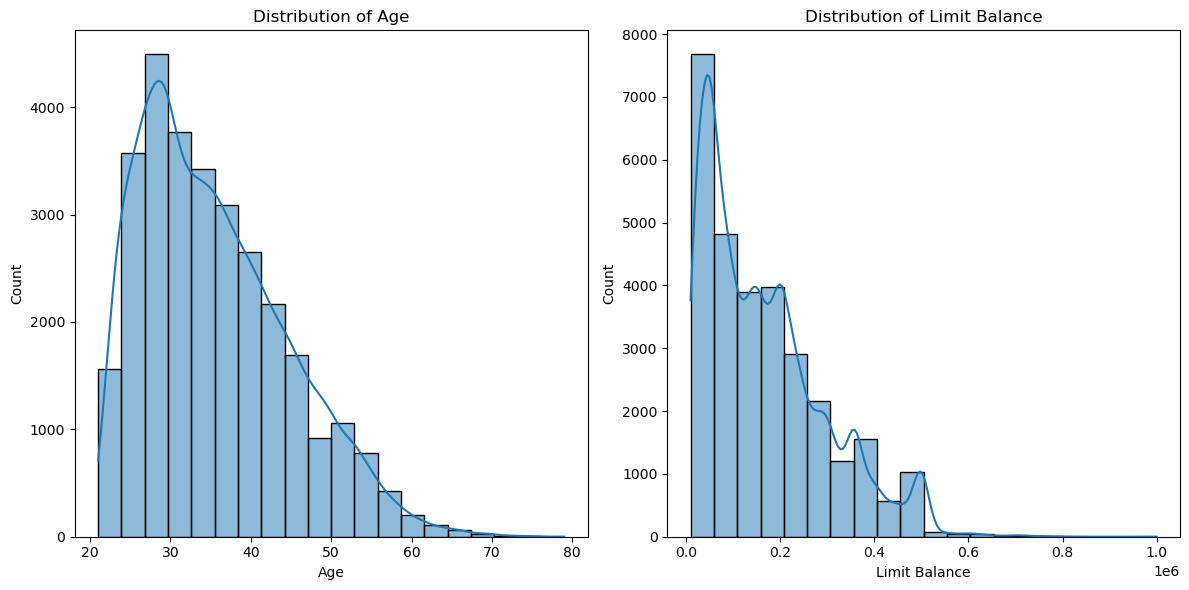

In [9]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms for AGE and LIMIT_BAL
sns.histplot(defaulters_df['AGE'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')

sns.histplot(defaulters_df['LIMIT_BAL'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Limit Balance')
axes[1].set_xlabel('Limit Balance')

plt.tight_layout()
plt.show()

Insights Drawn:
1. The incidence of defaulters tends to decline with age.
2. The majority of defaulters fall within the age range of late 20s to early 30s.
3. A higher proportion of defaulters have lower balance limits compared to those with larger balance limits.


### Bar Charts for Categorical Variables (e.g., SEX, EDUCATION, MARRIAGE):
##### Plot bar charts to visualize the distribution of categorical variables.

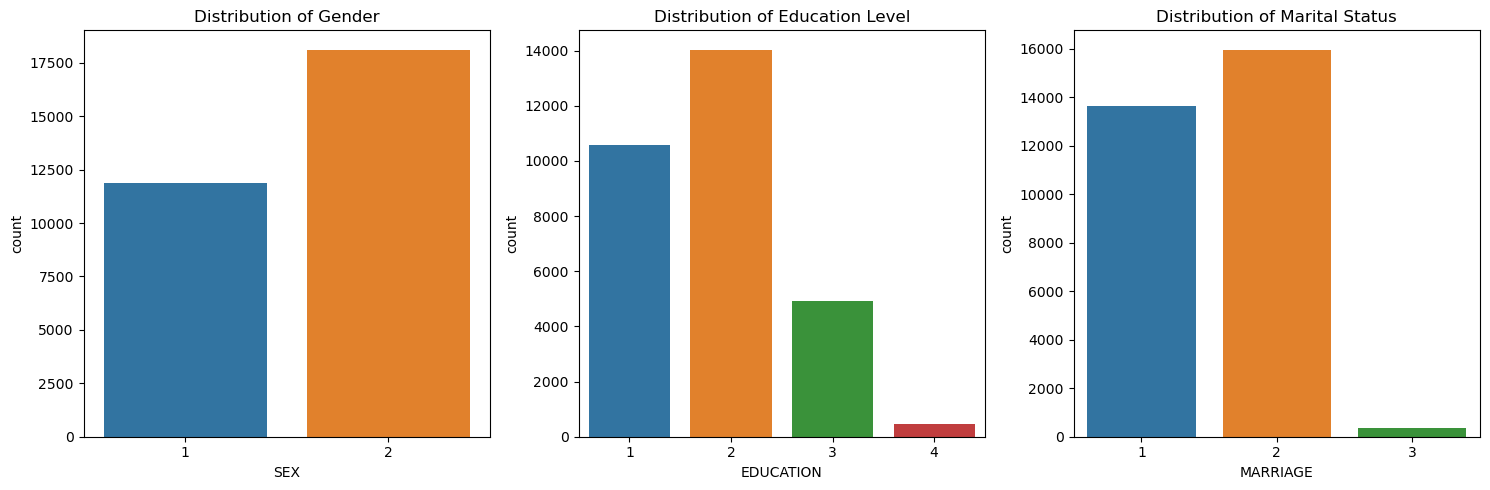

In [10]:
# Set up the figure and axis for categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot bar charts for SEX, EDUCATION, and MARRIAGE
sns.countplot(x='SEX', data=defaulters_df, ax=axes[0])
axes[0].set_title('Distribution of Gender')

sns.countplot(x='EDUCATION', data=defaulters_df, ax=axes[1])
axes[1].set_title('Distribution of Education Level')

sns.countplot(x='MARRIAGE', data=defaulters_df, ax=axes[2])
axes[2].set_title('Distribution of Marital Status')

plt.tight_layout()
plt.show()

Insights Drawn:
1. There's a higher prevalence of defaulting among females compared to males.
2. University students are more likely to default on payments compared to high school students or individuals in other educational settings.
3. Individuals with a marital status of "single" exhibit a greater propensity towards defaulting.

### Categorical Variables vs. Target Variable:
##### Explore the relationship between categorical variables (e.g., SEX, EDUCATION, MARRIAGE) and the target variable using stacked bar charts or violin plots.

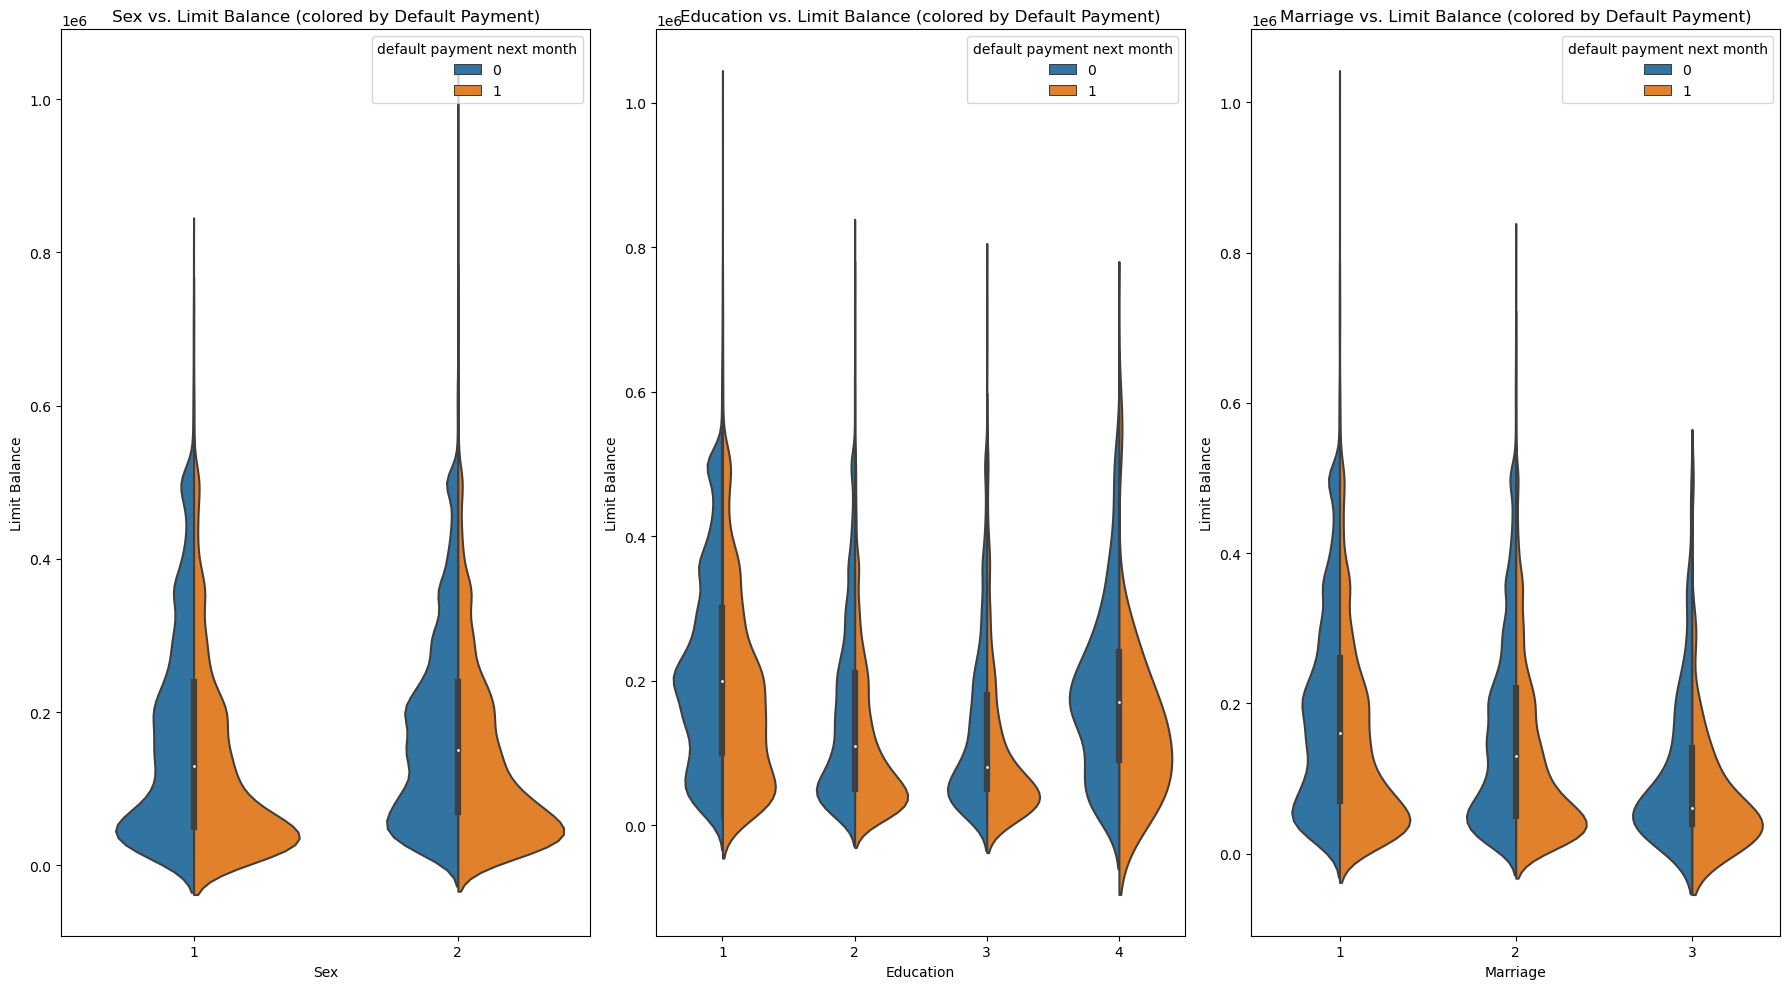

In [12]:
# Violin plots for categorical variables vs. target variable
plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.violinplot(x='SEX', y='LIMIT_BAL', hue='default payment next month', data=defaulters_df, split=True)
plt.title('Sex vs. Limit Balance (colored by Default Payment)')
plt.xlabel('Sex')
plt.ylabel('Limit Balance')

plt.subplot(1, 3, 2)
sns.violinplot(x='EDUCATION', y='LIMIT_BAL', hue='default payment next month', data=defaulters_df, split=True)
plt.title('Education vs. Limit Balance (colored by Default Payment)')
plt.xlabel('Education')
plt.ylabel('Limit Balance')

plt.subplot(1, 3, 3)
sns.violinplot(x='MARRIAGE', y='LIMIT_BAL', hue='default payment next month', data=defaulters_df, split=True)
plt.title('Marriage vs. Limit Balance (colored by Default Payment)')
plt.xlabel('Marriage')
plt.ylabel('Limit Balance')

plt.tight_layout()
plt.show()

Insights Drawn:
1. Women generally have higher limit balances.
2. There's a trend where women with lower limit balances are more likely to be defaulters, and conversely, those with higher limit balances are less likely to default.
3. Graduate students typically have higher limit balances.
4. Among graduate students, those with lower limit balances are more prevalent in the defaulter's list.
5. Married individuals tend to have higher limit balances.
6. The distribution of defaulters among different marital status categories appears to be similar.

### Correlation Analysis
##### Calculate the correlation matrix between numerical variables

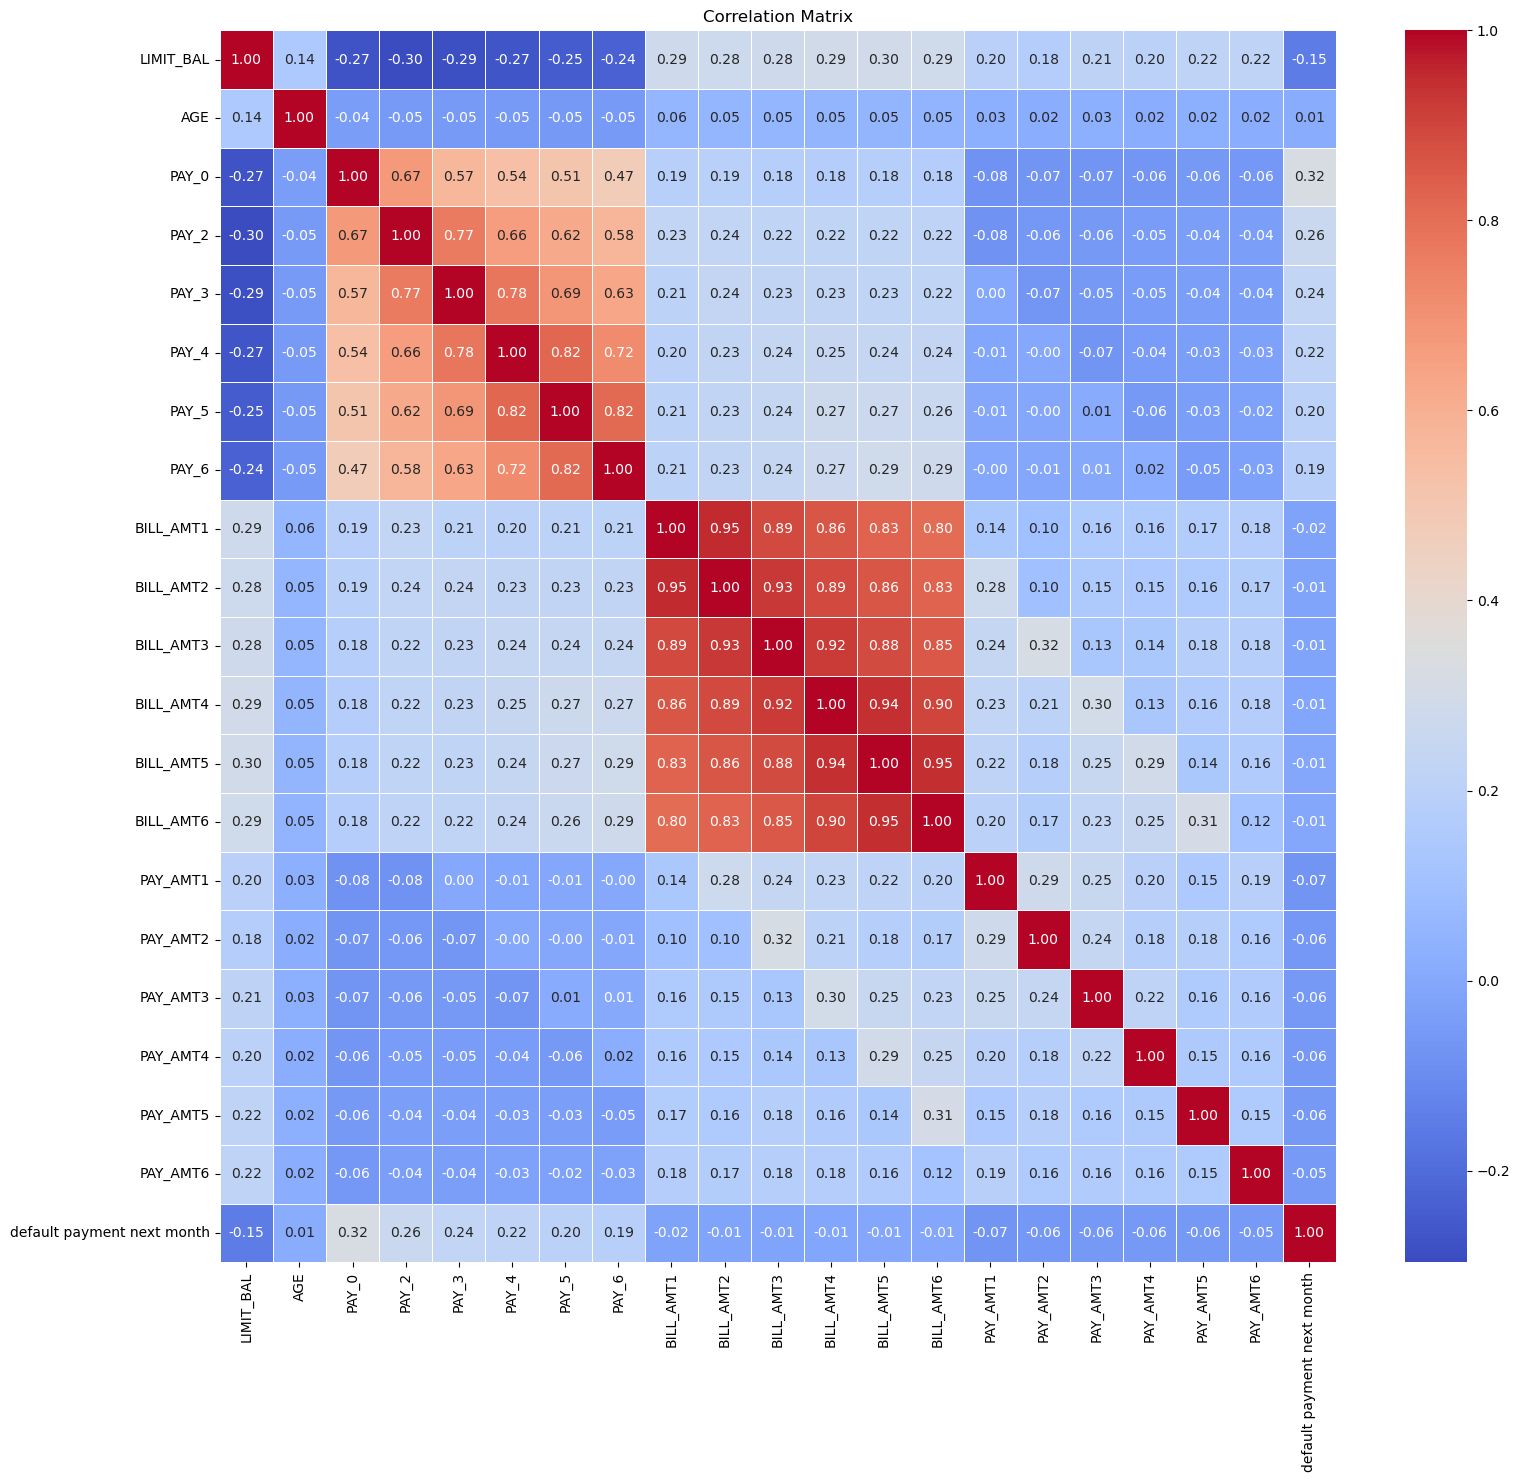

In [13]:
# Selecting numerical columns
numerical_columns = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                     'default payment next month']

# Calculate correlation matrix
correlation_matrix = defaulters_df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The high correlation is between different payments and bill amounts therefore I would not want to remove any features because I think they are all relevant

# _______________________________________________________
##### Now we will train the model to classify the credit card clients as defaulters and not defaulters based on their previous payment histories so we can try to make predictions about the future possibilities of them being defauters

### Classification of defaulters using Naive Bayers Classifiers

In [14]:
# Separate features (X) and target variable (y)
X = defaulters_df.drop('default payment next month', axis=1)
y = defaulters_df['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.37822222222222224
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.24      0.37      7040
           1       0.24      0.88      0.38      1960

    accuracy                           0.38      9000
   macro avg       0.56      0.56      0.38      9000
weighted avg       0.74      0.38      0.38      9000



### Classification of defaulters using KNN 

Accuracy for K=1: 0.6875555555555556
Accuracy for K=2: 0.7667777777777778
Accuracy for K=3: 0.7302222222222222
Accuracy for K=4: 0.7682222222222223
Accuracy for K=5: 0.75
Accuracy for K=6: 0.7691111111111111
Accuracy for K=7: 0.7593333333333333
Accuracy for K=8: 0.7737777777777778
Accuracy for K=9: 0.7682222222222223
Accuracy for K=10: 0.7781111111111111
Accuracy for K=11: 0.7694444444444445
Accuracy for K=12: 0.7788888888888889
Accuracy for K=13: 0.7733333333333333
Accuracy for K=14: 0.7798888888888889
Accuracy for K=15: 0.7767777777777778
Accuracy for K=16: 0.7812222222222223
Accuracy for K=17: 0.7798888888888889
Accuracy for K=18: 0.7816666666666666
Accuracy for K=19: 0.7767777777777778
Accuracy for K=20: 0.7814444444444445


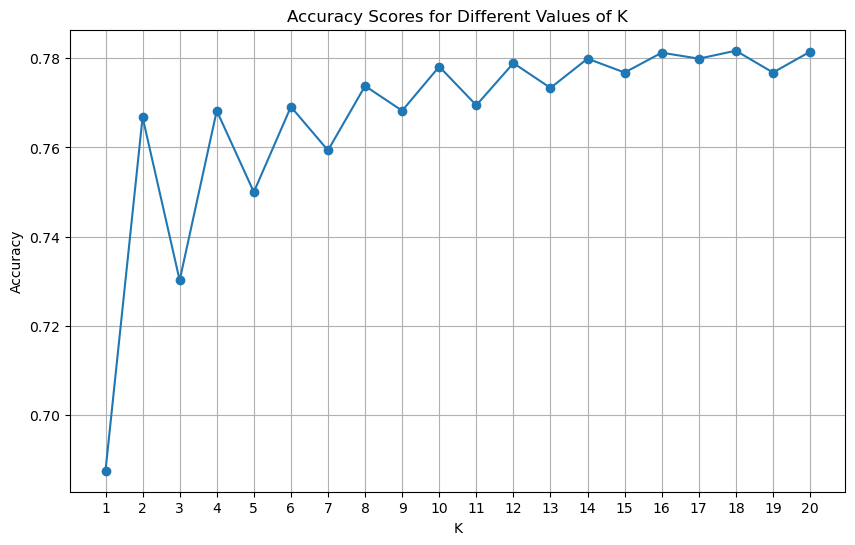

In [15]:
# Define a range of values for K
k_values = list(range(1, 21))

# Initialize lists to store accuracy scores for each value of K
accuracy_scores = []

# Iterate over each value of K
for k in k_values:
    # Initialize and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    # Predict the target variable on the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy score for the current value of K
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Print accuracy for the current value of K
    print(f"Accuracy for K={k}: {accuracy}")

# Plot accuracy scores for each value of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy Scores for Different Values of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Comparision of results for both models

In [16]:
# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict the target variable on the test set using Naive Bayes classifier
nb_y_pred = nb_classifier.predict(X_test)

# Calculate accuracy score for Naive Bayes classifier
nb_accuracy = accuracy_score(y_test, nb_y_pred)

# Print classification report for Naive Bayes classifier
print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_y_pred))

# Initialize lists to store accuracy scores for each value of K
knn_accuracy_scores = []

# Iterate over each value of K for KNN classifier
for k in k_values:
    # Initialize and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    # Predict the target variable on the test set using KNN classifier
    knn_y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy score for the current value of K
    knn_accuracy = accuracy_score(y_test, knn_y_pred)
    knn_accuracy_scores.append(knn_accuracy)

# Find the optimal K for KNN classifier
optimal_k = k_values[knn_accuracy_scores.index(max(knn_accuracy_scores))]
print(f"\nOptimal K for KNN classifier: {optimal_k}")

# Initialize and train the KNN classifier with the optimal K
optimal_knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn_classifier.fit(X_train, y_train)

# Predict the target variable on the test set using the optimal KNN classifier
optimal_knn_y_pred = optimal_knn_classifier.predict(X_test)

# Calculate accuracy score for the optimal KNN classifier
optimal_knn_accuracy = accuracy_score(y_test, optimal_knn_y_pred)

# Print classification report for the optimal KNN classifier
print("\nOptimal KNN Classifier:")
print(classification_report(y_test, optimal_knn_y_pred))

# Compare accuracy scores
print("\nComparison of Accuracy Scores:")
print(f"Naive Bayes Classifier Accuracy: {nb_accuracy}")
print(f"Optimal KNN Classifier Accuracy: {optimal_knn_accuracy}")

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.88      0.24      0.37      7040
           1       0.24      0.88      0.38      1960

    accuracy                           0.38      9000
   macro avg       0.56      0.56      0.38      9000
weighted avg       0.74      0.38      0.38      9000


Optimal K for KNN classifier: 18

Optimal KNN Classifier:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      7040
           1       0.49      0.08      0.14      1960

    accuracy                           0.78      9000
   macro avg       0.64      0.53      0.51      9000
weighted avg       0.73      0.78      0.71      9000


Comparison of Accuracy Scores:
Naive Bayes Classifier Accuracy: 0.37822222222222224
Optimal KNN Classifier Accuracy: 0.7816666666666666


# ___________________________________________________________
### In conclusion, our analysis indicates that the K-Nearest Neighbors (KNN) algorithm outperforms Naive Bayes method, particularly with an optimal K value of 18. This suggests that there is approximately a 78% accuracy rate in predicting potential defaulters based on their historical data, according to our model.
# ___________________________________________________________